<a href="https://colab.research.google.com/github/NotHumans211/Project-Jupyter-Notebook/blob/main/Bank_Negara_Indonesia_Stock_Historical_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

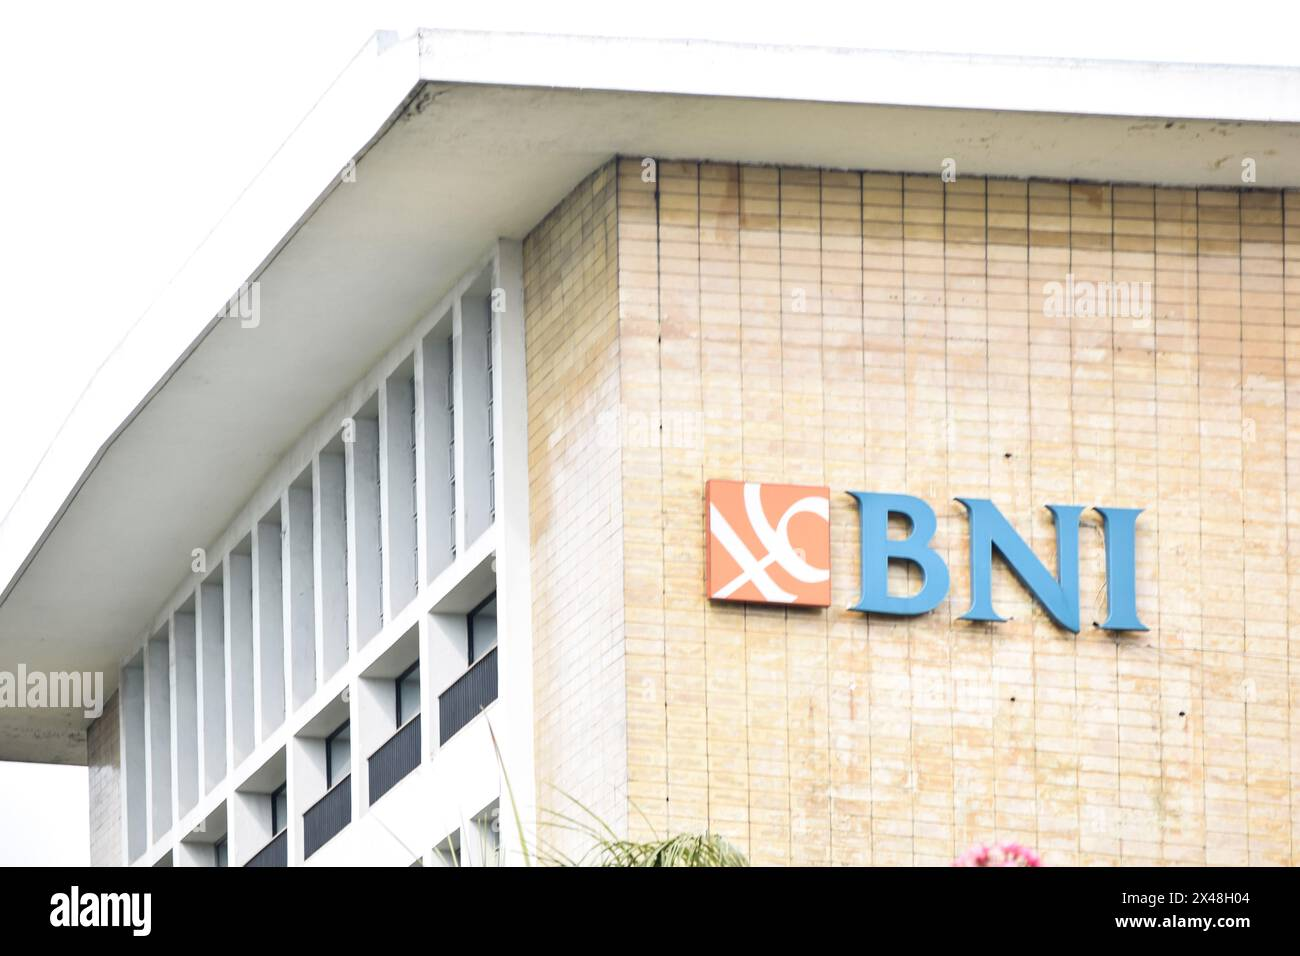

#**Bank Negara Indonesia Stock Historical Price**

PT Bank Negara Indonesia (Persero) Tbk Stock Historical Price (BBNI.JK)
from January 2019 until present.

**Dataset** : https://www.kaggle.com/datasets/caesarmario/bank-negara-indonesia-stock-historical-price

**Create :** Moh Yahya

> Tambahkan blockquote



#Exploratory Data Analysis (EDA)


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
bbni_daily = pd.read_csv('dataBNI/BBNI.JK.csv')
bbni_monthly = pd.read_csv('dataBNI/BBNI.JK_monthly.csv')
bbni_weekly = pd.read_csv('dataBNI/BBNI.JK_weekly.csv')

# Check the first few rows of each dataset
print(bbni_daily.head())
print(bbni_monthly.head())
print(bbni_weekly.head())

# General information and missing values
print(bbni_daily.info())
print(bbni_monthly.info())
print(bbni_weekly.info())

# Descriptive statistics
print(bbni_daily.describe())
print(bbni_monthly.describe())
print(bbni_weekly.describe())


         Date    Open    High     Low   Close    Adj Close    Volume
0  2019-01-01  4400.0  4400.0  4400.0  4400.0  3718.354004         0
1  2019-01-02  4400.0  4400.0  4337.5  4362.5  3686.663818  15681200
2  2019-01-03  4337.5  4387.5  4325.0  4362.5  3686.663818  21416600
3  2019-01-04  4362.5  4400.0  4337.5  4362.5  3686.663818  41078600
4  2019-01-07  4412.5  4462.5  4412.5  4437.5  3750.044189  48108200
         Date    Open    High     Low   Close    Adj Close      Volume
0  2018-12-31  4400.0  4700.0  4325.0  4537.5  3834.552246   996016400
1  2019-01-31  4550.0  4662.5  4325.0  4400.0  3718.354004   662752400
2  2019-02-28  4412.5  4825.0  4262.5  4700.0  3971.878174   517327000
3  2019-03-31  4712.5  5125.0  4700.0  4800.0  4056.385986   633546200
4  2019-04-30  4800.0  4800.0  3912.5  4200.0  3549.337891  1347774600
         Date    Open    High     Low   Close    Adj Close     Volume
0  2018-12-31  4400.0  4462.5  4325.0  4437.5  3750.044434  126284600
1  2019-01-07  4437.

#Visualisasi Harga Penutupan

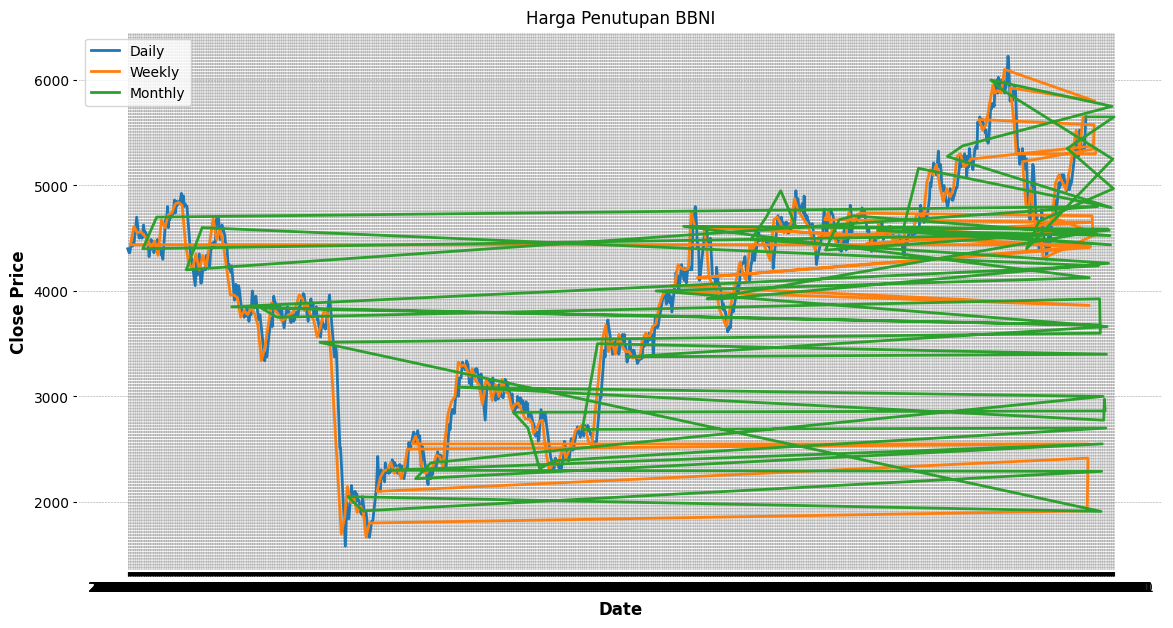

In [69]:
plt.figure(figsize=(14,7))
plt.plot(bbni_daily['Date'], bbni_daily['Close'], label='Daily')
plt.plot(bbni_weekly['Date'], bbni_weekly['Close'], label='Weekly')
plt.plot(bbni_monthly['Date'], bbni_monthly['Close'], label='Monthly')
plt.title('Harga Penutupan BBNI')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#Moving Average Calculation


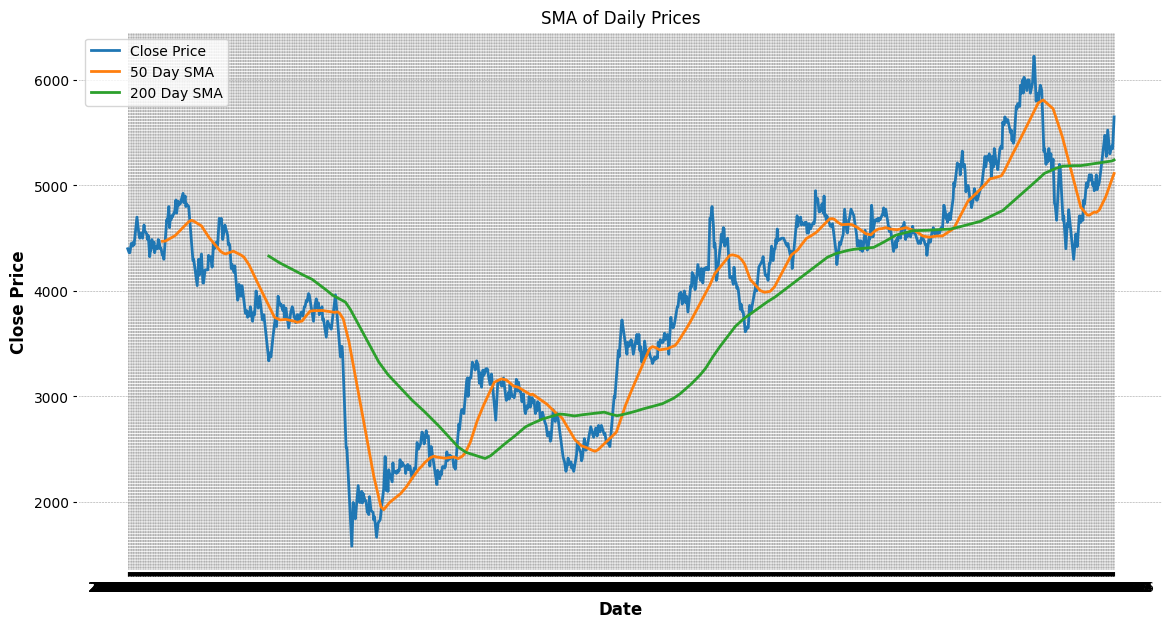

In [70]:
# Simple Moving Average (SMA)
bbni_daily['SMA_50'] = bbni_daily['Close'].rolling(window=50).mean()
bbni_daily['SMA_200'] = bbni_daily['Close'].rolling(window=200).mean()

plt.figure(figsize=(14,7))
plt.plot(bbni_daily['Date'], bbni_daily['Close'], label='Close Price')
plt.plot(bbni_daily['Date'], bbni_daily['SMA_50'], label='50 Day SMA')
plt.plot(bbni_daily['Date'], bbni_daily['SMA_200'], label='200 Day SMA')
plt.title('SMA of Daily Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#Volatility Calculation


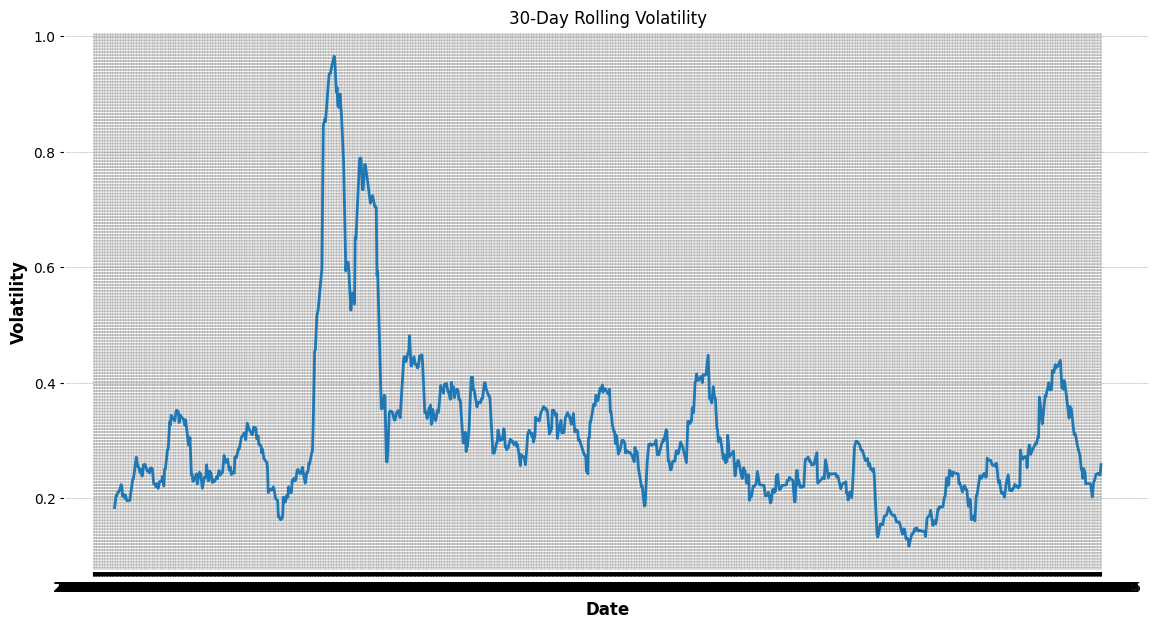

In [71]:
# Calculate the daily return
bbni_daily['Return'] = bbni_daily['Close'].pct_change()

# Volatility (standard deviation of returns)
volatility = bbni_daily['Return'].rolling(window=30).std() * (252**0.5)  # Annualized volatility
plt.figure(figsize=(14,7))
plt.plot(bbni_daily['Date'], volatility, label='Volatility')
plt.title('30-Day Rolling Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.show()

#Candlestick Chart

<ipython-input-72-e50000cb4a2a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.10/dist-packages/mplfinance/_arg_validators.py:84: UserWarning:




            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.




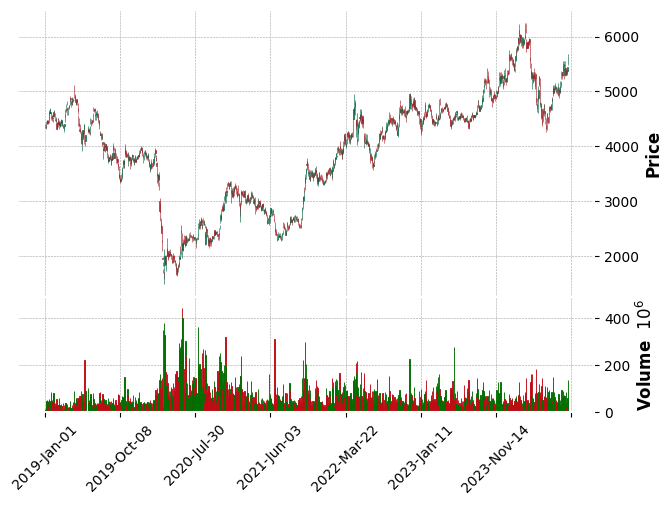

In [72]:
import mplfinance as mpf

# Candlestick chart for daily data
bbni_daily_candle = bbni_daily[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
bbni_daily_candle['Date'] = pd.to_datetime(bbni_daily_candle['Date'])
bbni_daily_candle.set_index('Date', inplace=True)

mpf.plot(bbni_daily_candle, type='candle', volume=True, style='charles')

#Autocorrelation Plot dan ADF Test


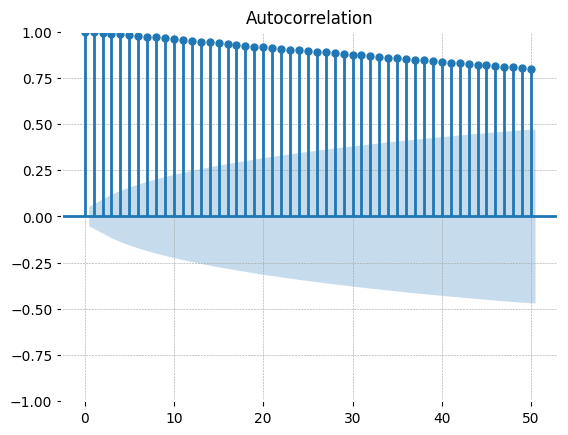

ADF Statistic: -1.1580453081654916
p-value: 0.691378338250133
Critical Values:
	1%: -3.4350871503340508
	5%: -2.863632105852836
	10%: -2.567883833038199


In [73]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller

# Autocorrelation plot
plot_acf(bbni_daily['Close'].dropna(), lags=50)
plt.show()

# ADF Test
result = adfuller(bbni_daily['Close'].dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

#Volume Analysis


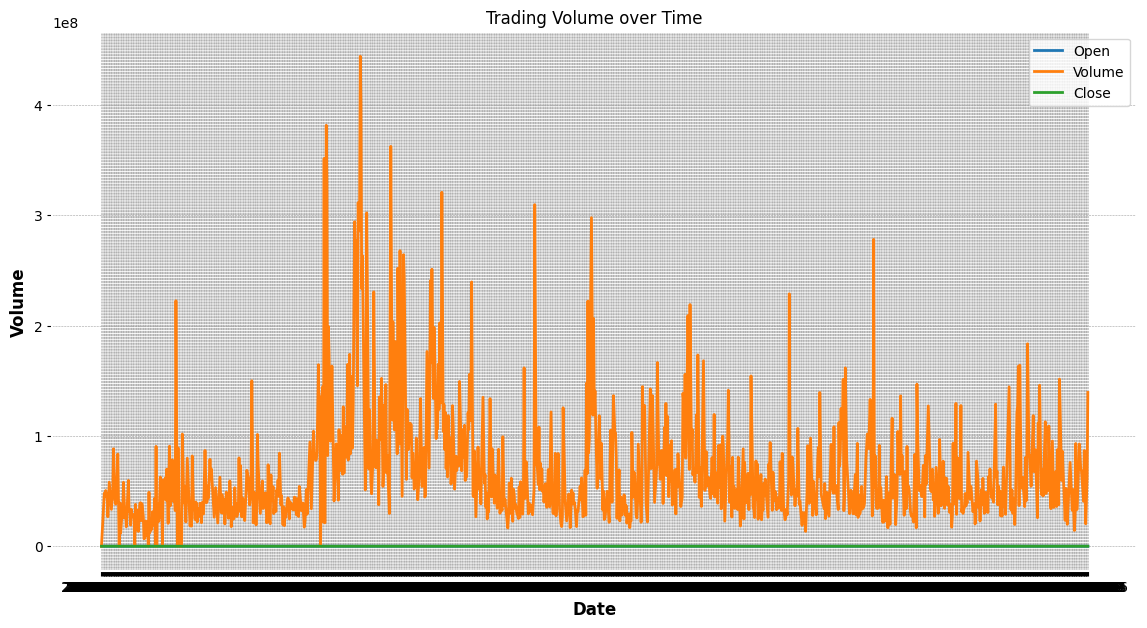

          Volume     Close
Volume  1.000000 -0.335188
Close  -0.335188  1.000000


In [74]:
plt.figure(figsize=(14,7))
plt.plot(bbni_daily['Date'], bbni_daily['Open'], label='Open')
plt.plot(bbni_daily['Date'], bbni_daily['Volume'], label='Volume')
plt.plot(bbni_daily['Date'], bbni_daily['Close'], label='Close')
plt.legend()
plt.title('Trading Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.show()

# Check correlation between volume and close price
print(bbni_daily[['Volume', 'Close']].corr())


#Bollinger Bands

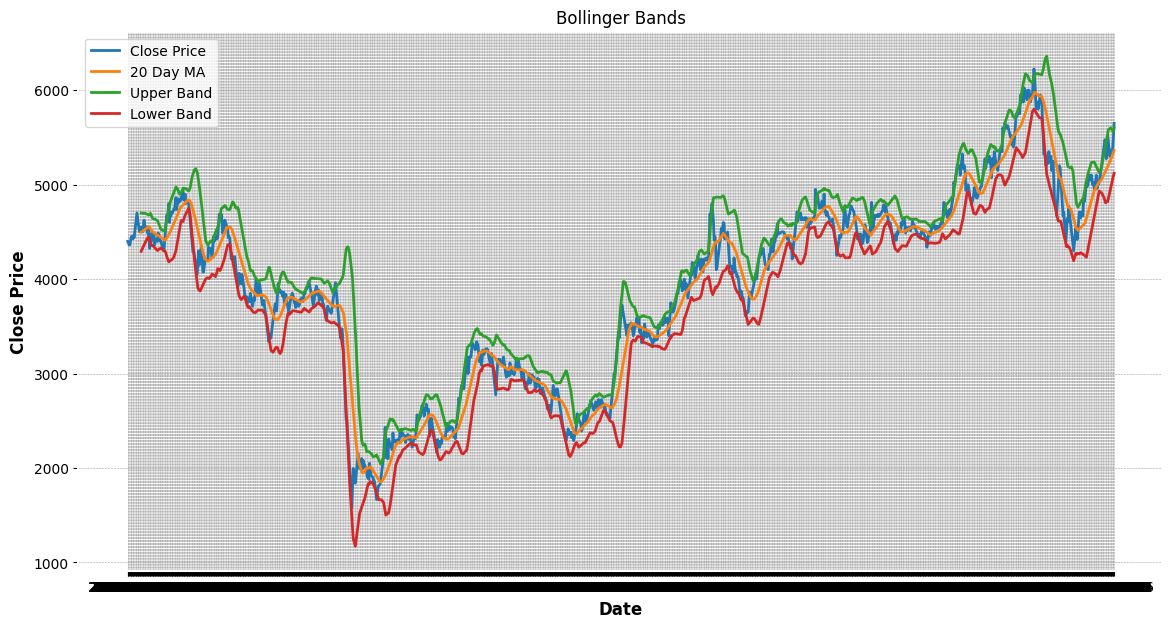

In [75]:
# Bollinger Bands
bbni_daily['MA20'] = bbni_daily['Close'].rolling(window=20).mean()
bbni_daily['Upper_Band'] = bbni_daily['MA20'] + (bbni_daily['Close'].rolling(window=20).std() * 2)
bbni_daily['Lower_Band'] = bbni_daily['MA20'] - (bbni_daily['Close'].rolling(window=20).std() * 2)

plt.figure(figsize=(14,7))
plt.plot(bbni_daily['Date'], bbni_daily['Close'], label='Close Price')
plt.plot(bbni_daily['Date'], bbni_daily['MA20'], label='20 Day MA')
plt.plot(bbni_daily['Date'], bbni_daily['Upper_Band'], label='Upper Band')
plt.plot(bbni_daily['Date'], bbni_daily['Lower_Band'], label='Lower Band')
plt.title('Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#Sharpe Ratio

In [76]:
# Sharpe Ratio (Assume risk-free rate is 0 for simplicity)
mean_return = bbni_daily['Return'].mean()

# Calculate Sharpe Ratio
mean_return = bbni_daily['Return'].mean()
std_return = bbni_daily['Return'].std()
sharpe_ratio = mean_return / std_return
print(f'Sharpe Ratio: {sharpe_ratio}')

Sharpe Ratio: 0.01903717290290943


#Decomposition Time Series

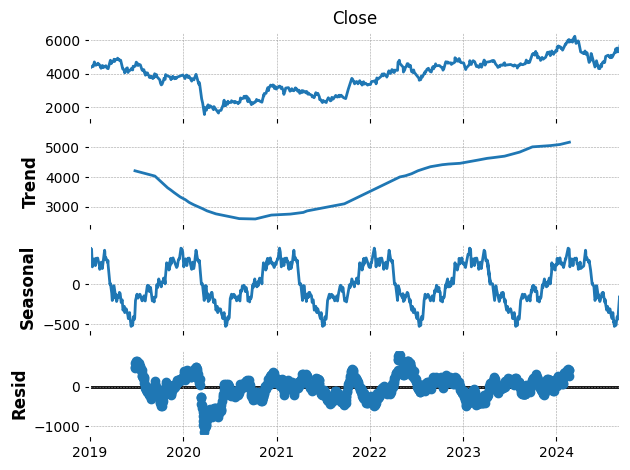

In [77]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Convert 'Date' to datetime and set it as index
bbni_daily['Date'] = pd.to_datetime(bbni_daily['Date'])
bbni_daily.set_index('Date', inplace=True)

# Decomposition (Additive)
result = seasonal_decompose(bbni_daily['Close'], model='additive', period=252)
result.plot()
plt.show()

#Technical Indicators (RSI, MACD, ATR)

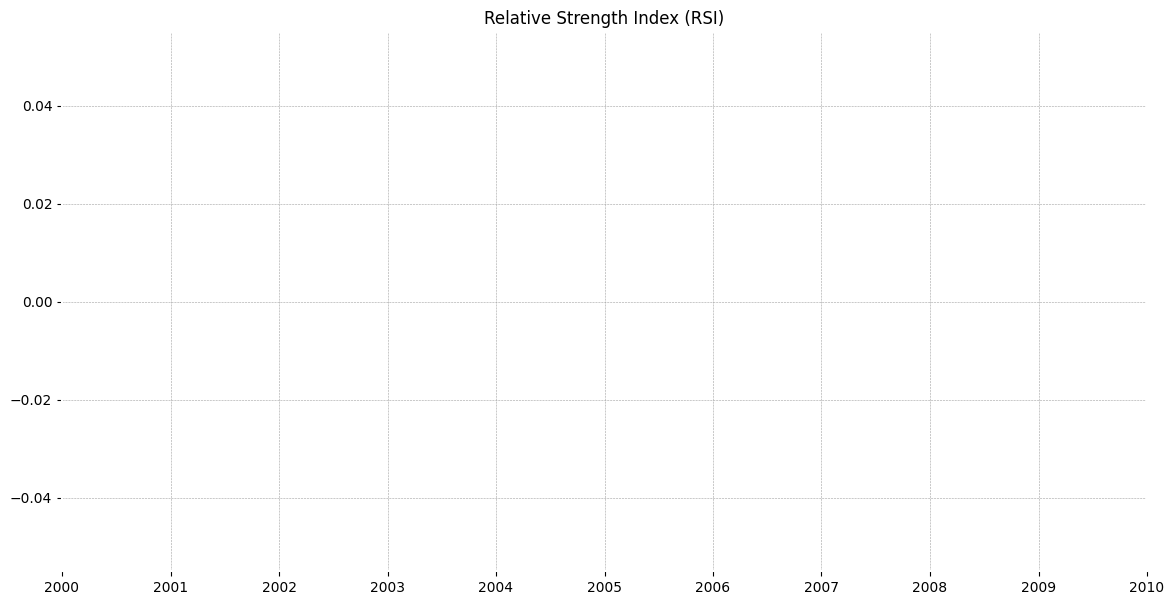

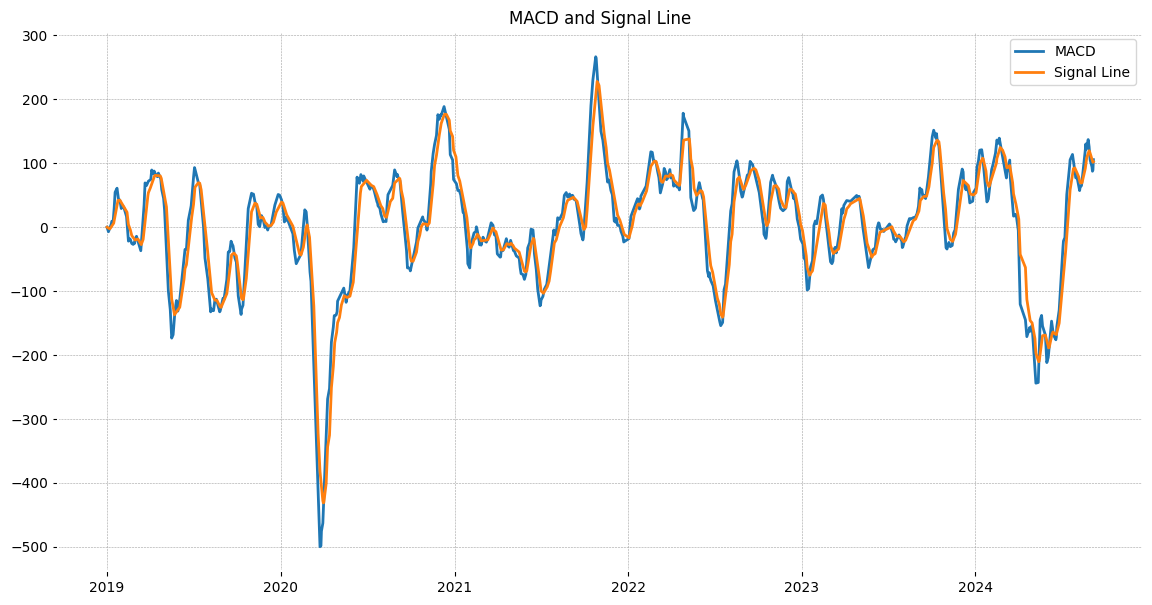

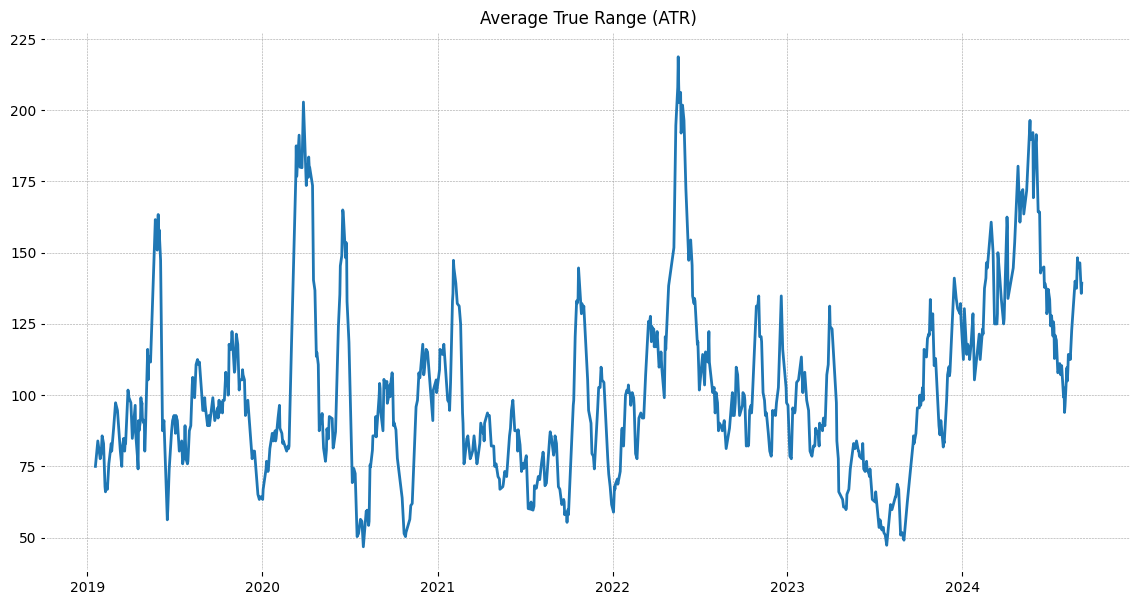

In [80]:
import numpy as np

# Relative Strength Index (RSI)
def RSI(series, period=14):
    delta = series.diff(1)
    gain = np.where(delta > 0, delta, 0)
    loss = np.where(delta < 0, -delta, 0)
    avg_gain = pd.Series(gain).rolling(window=period).mean()
    avg_loss = pd.Series(loss).rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

bbni_daily['RSI'] = RSI(bbni_daily['Close'], period=14)

# MACD (Moving Average Convergence Divergence)
bbni_daily['EMA_12'] = bbni_daily['Close'].ewm(span=12, adjust=False).mean()
bbni_daily['EMA_26'] = bbni_daily['Close'].ewm(span=26, adjust=False).mean()
bbni_daily['MACD'] = bbni_daily['EMA_12'] - bbni_daily['EMA_26']
bbni_daily['Signal_Line'] = bbni_daily['MACD'].ewm(span=9, adjust=False).mean()

# Average True Range (ATR)
bbni_daily['High-Low'] = bbni_daily['High'] - bbni_daily['Low']
bbni_daily['High-Close'] = np.abs(bbni_daily['High'] - bbni_daily['Close'].shift(1))
bbni_daily['Low-Close'] = np.abs(bbni_daily['Low'] - bbni_daily['Close'].shift(1))
bbni_daily['TR'] = bbni_daily[['High-Low', 'High-Close', 'Low-Close']].max(axis=1)
bbni_daily['ATR'] = bbni_daily['TR'].rolling(window=14).mean()

# Drop temporary columns
bbni_daily.drop(['High-Low', 'High-Close', 'Low-Close', 'TR', 'EMA_12', 'EMA_26'], axis=1, inplace=True)

# Plot RSI
plt.figure(figsize=(14,7))
plt.plot(bbni_daily.index, bbni_daily['RSI'], label='RSI')
plt.title('Relative Strength Index (RSI)')
plt.show()

# Plot MACD and Signal Line
plt.figure(figsize=(14,7))
plt.plot(bbni_daily.index, bbni_daily['MACD'], label='MACD')
plt.plot(bbni_daily.index, bbni_daily['Signal_Line'], label='Signal Line')
plt.title('MACD and Signal Line')
plt.legend()
plt.show()

# Plot Average True Range (ATR)
plt.figure(figsize=(14,7))
plt.plot(bbni_daily.index, bbni_daily['ATR'], label='ATR')
plt.title('Average True Range (ATR)')
plt.show()

#Outlier Detection

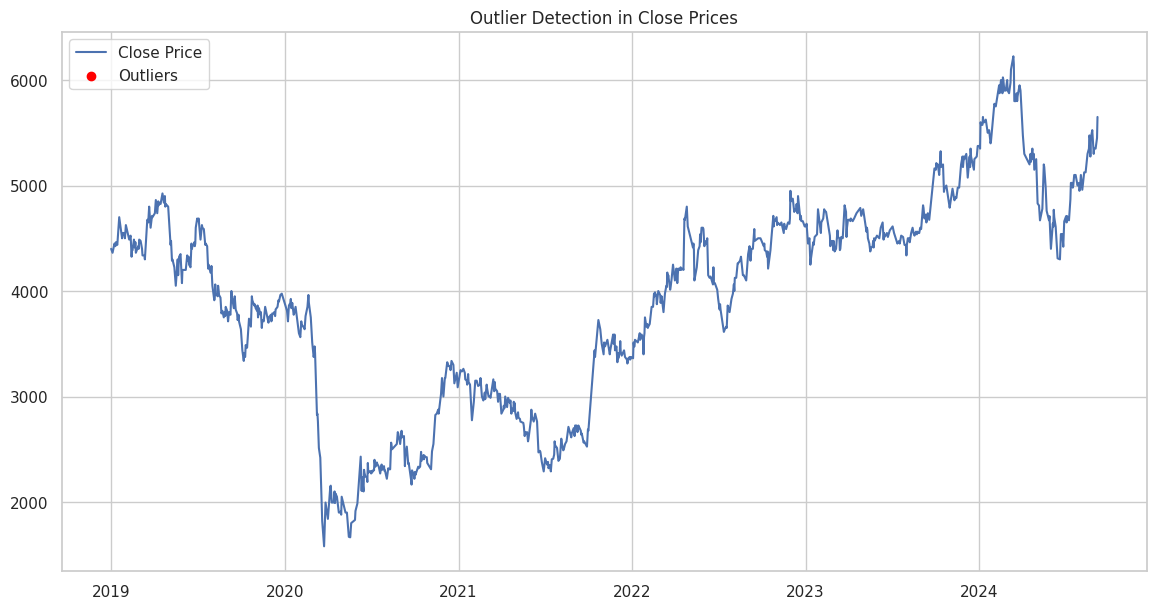

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume, SMA_50, SMA_200, Return, MA20, Upper_Band, Lower_Band, RSI, MACD, Signal_Line, ATR, Z-Score]
Index: []


In [84]:
from scipy import stats

# Detecting outliers using Z-score
bbni_daily['Z-Score'] = np.abs(stats.zscore(bbni_daily['Close']))
outliers = bbni_daily[bbni_daily['Z-Score'] > 3]

plt.figure(figsize=(14,7))
plt.plot(bbni_daily.index, bbni_daily['Close'], label='Close Price')
plt.scatter(outliers.index, outliers['Close'], color='red', label='Outliers', marker='o')
plt.title('Outlier Detection in Close Prices')
plt.legend()
plt.show()

print(outliers)  # View the outliers

#Sharpe Ratio & Performance Metrics

In [85]:
# Sharpe Ratio (Assume risk-free rate is 0)
mean_return = bbni_daily['Return'].mean()
std_return = bbni_daily['Return'].std()
sharpe_ratio = mean_return / std_return

# Sortino Ratio
downside_risk = bbni_daily[bbni_daily['Return'] < 0]['Return'].std()
sortino_ratio = mean_return / downside_risk

print(f'Sharpe Ratio: {sharpe_ratio}')
print(f'Sortino Ratio: {sortino_ratio}')


Sharpe Ratio: 0.01903717290290943
Sortino Ratio: 0.027571252272025643


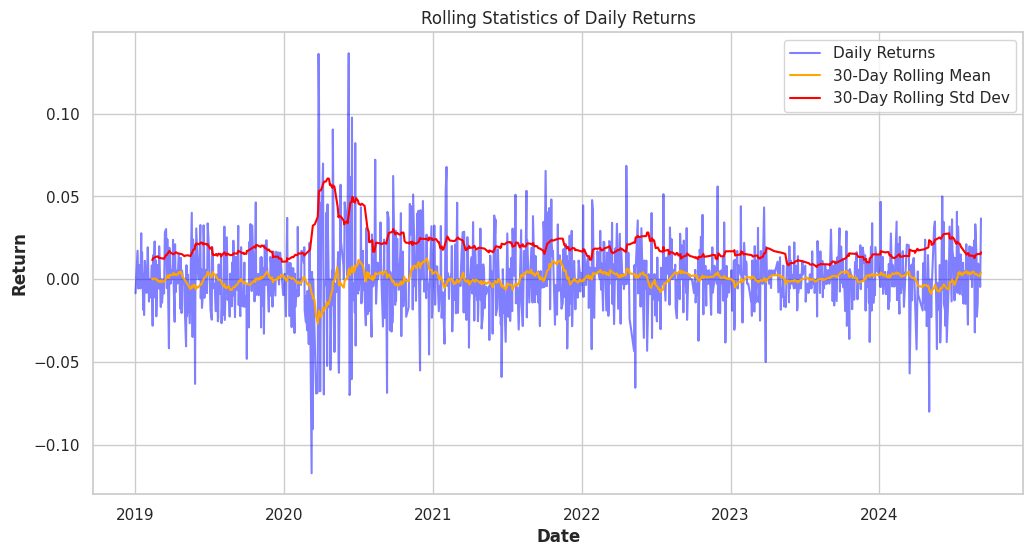

In [109]:
rolling_mean = bbni_daily['Return'].rolling(window=30).mean()
rolling_std = bbni_daily['Return'].rolling(window=30).std()

plt.figure(figsize=(12, 6))
plt.plot(bbni_daily.index, bbni_daily['Return'], label='Daily Returns', color='blue', alpha=0.5)
plt.plot(bbni_daily.index, rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.plot(bbni_daily.index, rolling_std, label='30-Day Rolling Std Dev', color='red')
plt.title('Rolling Statistics of Daily Returns')
plt.xlabel('Date')
plt.ylabel('Return')
plt.legend()
plt.grid(True)
plt.show()

#Event Study Analysis

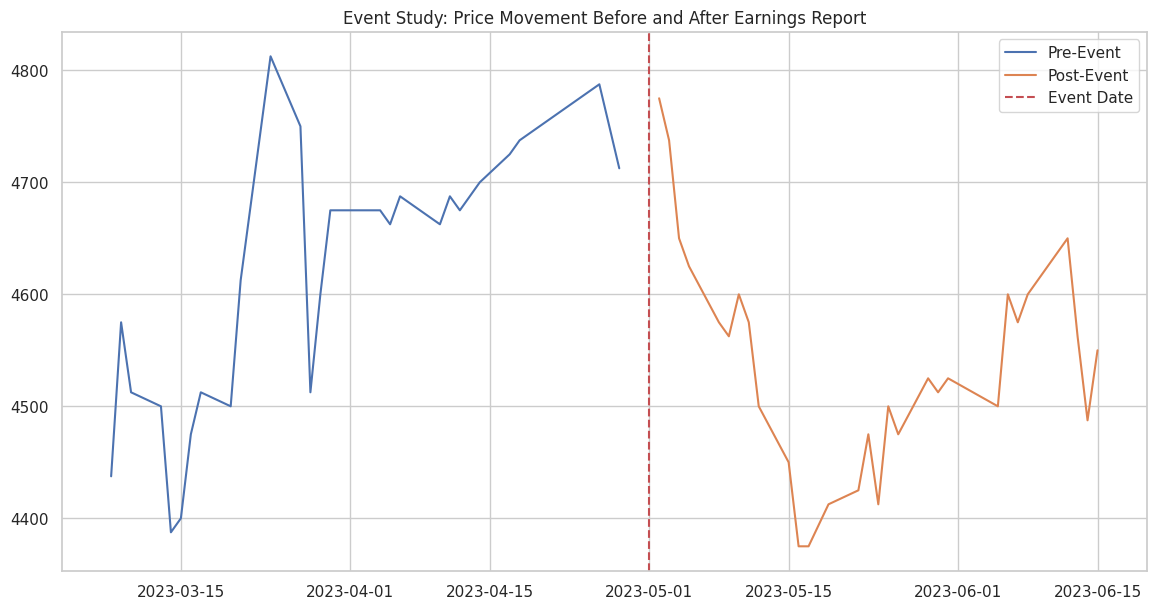

In [86]:
# Example: Study the effect of earnings report event on stock price
event_date = '2023-05-01'  # Assume this is an event date (earnings report)
window = 30  # Window of 30 days before and after event

# Filter around the event date
event_period = bbni_daily.loc[event_date:][:window]
pre_event_period = bbni_daily.loc[:event_date][-window:]

plt.figure(figsize=(14,7))
plt.plot(pre_event_period.index, pre_event_period['Close'], label='Pre-Event')
plt.plot(event_period.index, event_period['Close'], label='Post-Event')
plt.axvline(pd.to_datetime(event_date), color='r', linestyle='--', label='Event Date')
plt.title('Event Study: Price Movement Before and After Earnings Report')
plt.legend()
plt.show()

#Cross-Timeframe Analysis

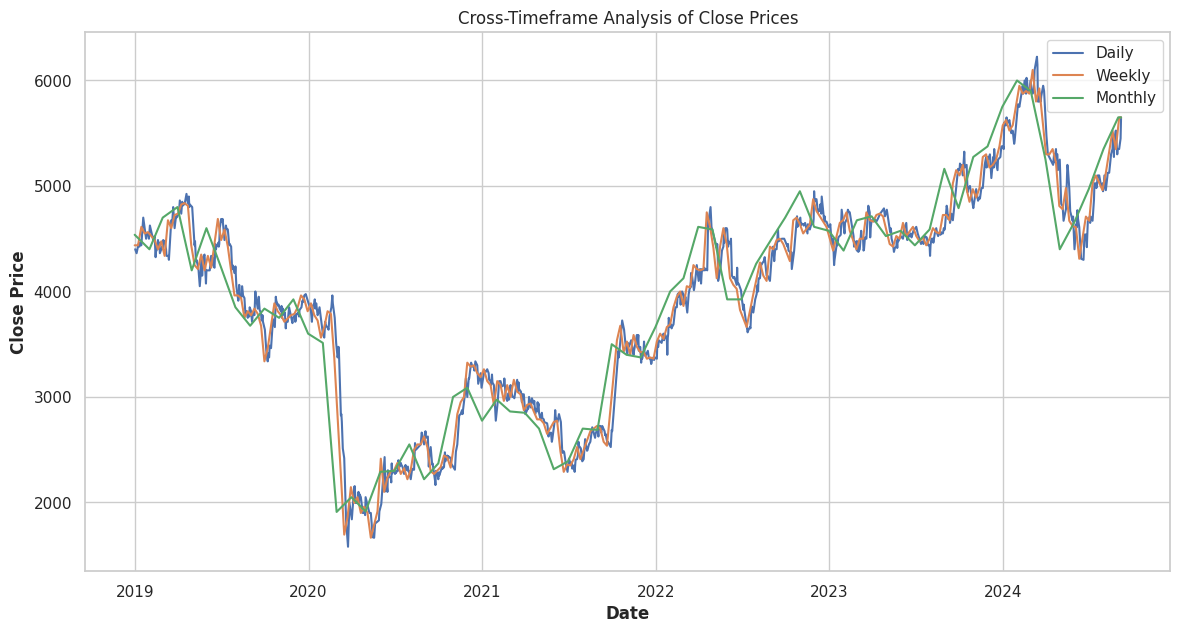

In [88]:
# Compare daily, weekly, and monthly data
plt.figure(figsize=(14,7))
plt.plot(bbni_daily.index, bbni_daily['Close'], label='Daily')

# Convert 'Date' column to datetime objects
bbni_weekly['Date'] = pd.to_datetime(bbni_weekly['Date'])
plt.plot(bbni_weekly['Date'], bbni_weekly['Close'], label='Weekly')

# Convert 'Date' column to datetime objects
bbni_monthly['Date'] = pd.to_datetime(bbni_monthly['Date'])
plt.plot(bbni_monthly['Date'], bbni_monthly['Close'], label='Monthly')

plt.title('Cross-Timeframe Analysis of Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

#Comparative Analysis

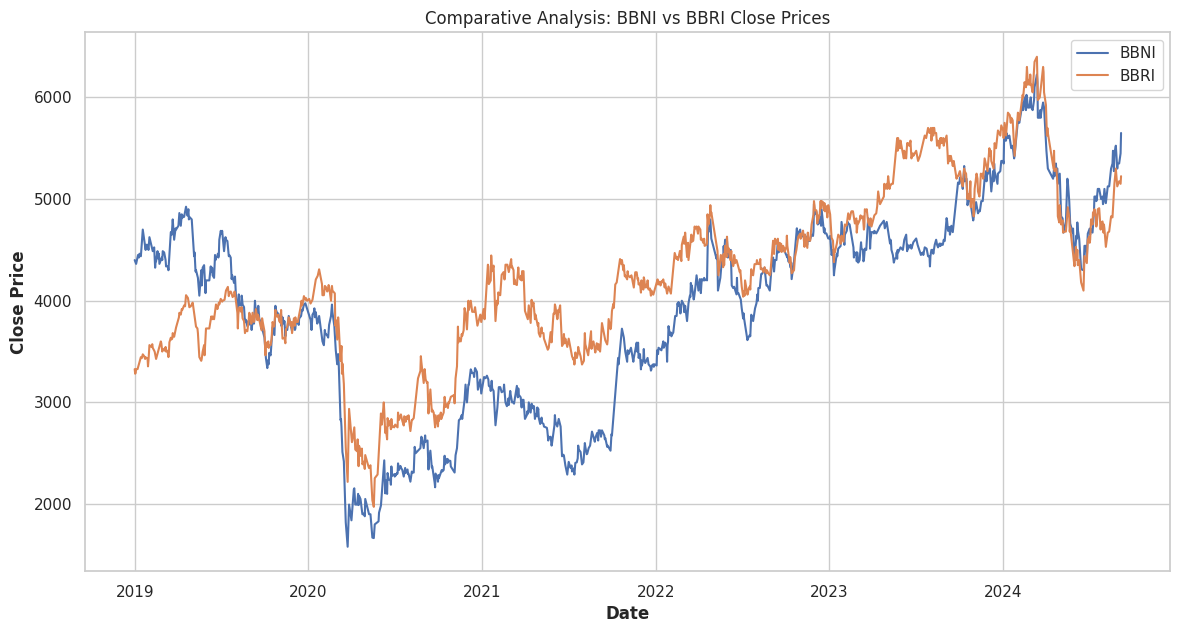

In [91]:
# Load another stock data (e.g., another bank stock)
bbri_daily = pd.read_csv('dataBNI/BBRI.JK.csv')
bbri_daily['Date'] = pd.to_datetime(bbri_daily['Date'])
bbri_daily.set_index('Date', inplace=True)

plt.figure(figsize=(14,7))
plt.plot(bbni_daily.index, bbni_daily['Close'], label='BBNI')
plt.plot(bbri_daily.index, bbri_daily['Close'], label='BBRI')
plt.title('Comparative Analysis: BBNI vs BBRI Close Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Cluster Analysis (K-Means Clustering)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



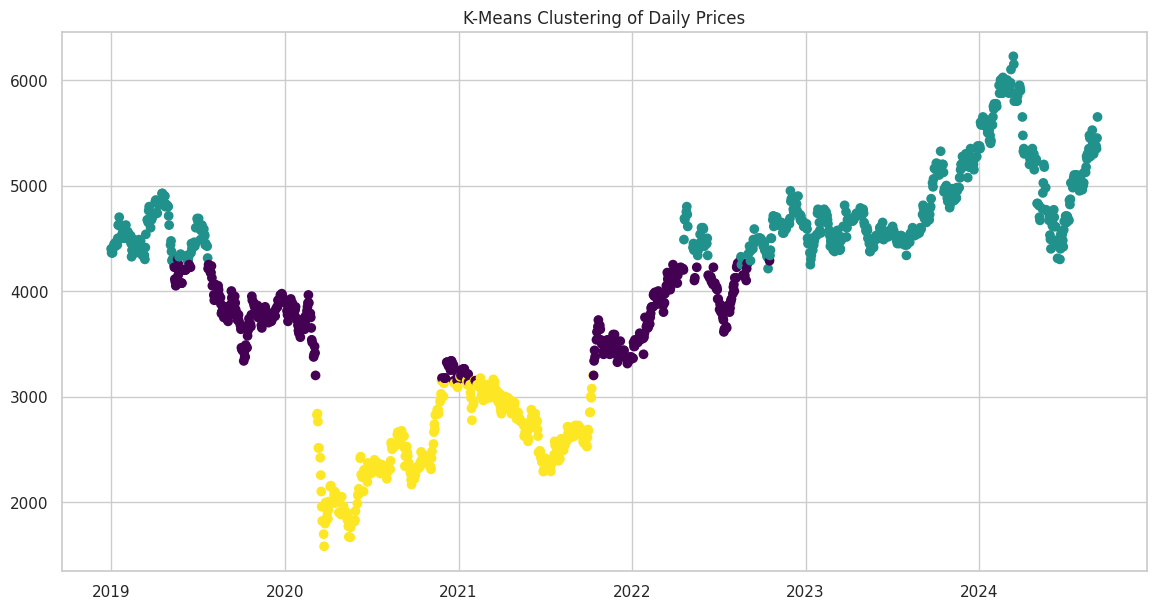

In [92]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Preprocess the data (scale features)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bbni_daily[['Open', 'High', 'Low', 'Close']])

# K-Means Clustering
kmeans = KMeans(n_clusters=3)
bbni_daily['Cluster'] = kmeans.fit_predict(scaled_data)

plt.figure(figsize=(14,7))
plt.scatter(bbni_daily.index, bbni_daily['Close'], c=bbni_daily['Cluster'], cmap='viridis')
plt.title('K-Means Clustering of Daily Prices')
plt.show()

#Correlation Analysis dengan Eksternal Factors

In [98]:
# Example: Correlating BBNI Close Price with Crude Oil Prices
crude_oil = pd.read_csv('dataBNI/crude-oil-price.csv')
crude_oil['date'] = pd.to_datetime(crude_oil['date'])
crude_oil.set_index('date', inplace=True)

# Ensure both indices are timezone-naive
bbni_daily.index = bbni_daily.index.tz_localize(None)
crude_oil.index = crude_oil.index.tz_localize(None)

# Merge data on date
merged_data = bbni_daily[['Close']].merge(crude_oil[['price']], left_index=True, right_index=True, how='inner') # Changed 'Price' to 'price'
# Correlation analysis
correlation = merged_data.corr()
print(correlation)

          Close     price
Close  1.000000  0.490678
price  0.490678  1.000000


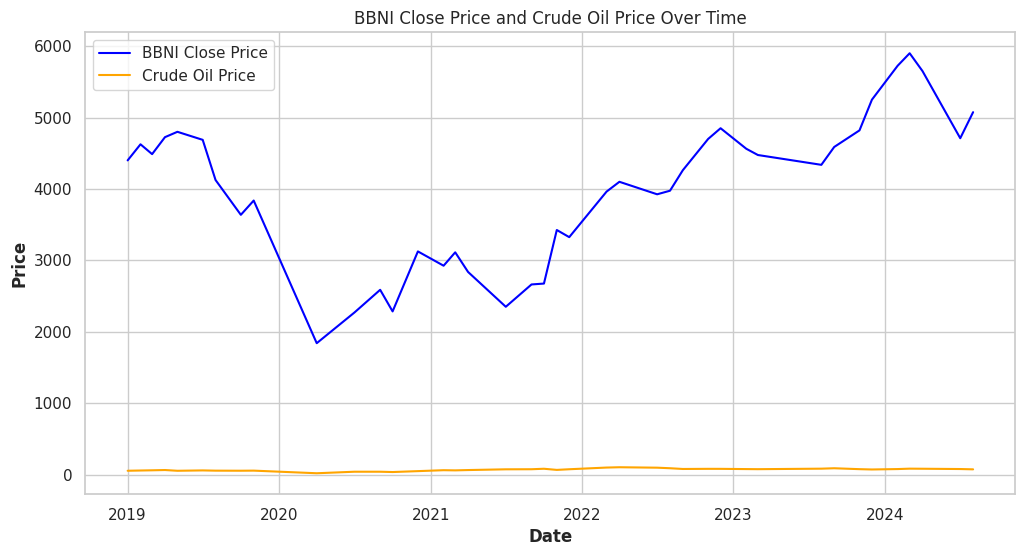

In [103]:
# Line plot
plt.figure(figsize=(12, 6))
plt.plot(merged_data.index, merged_data['Close'], label='BBNI Close Price', color='blue')
plt.plot(merged_data.index, merged_data['price'], label='Crude Oil Price', color='orange')
plt.title('BBNI Close Price and Crude Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

#Backtesting Trading Strategy

<ipython-input-99-7e40b697c3c9>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



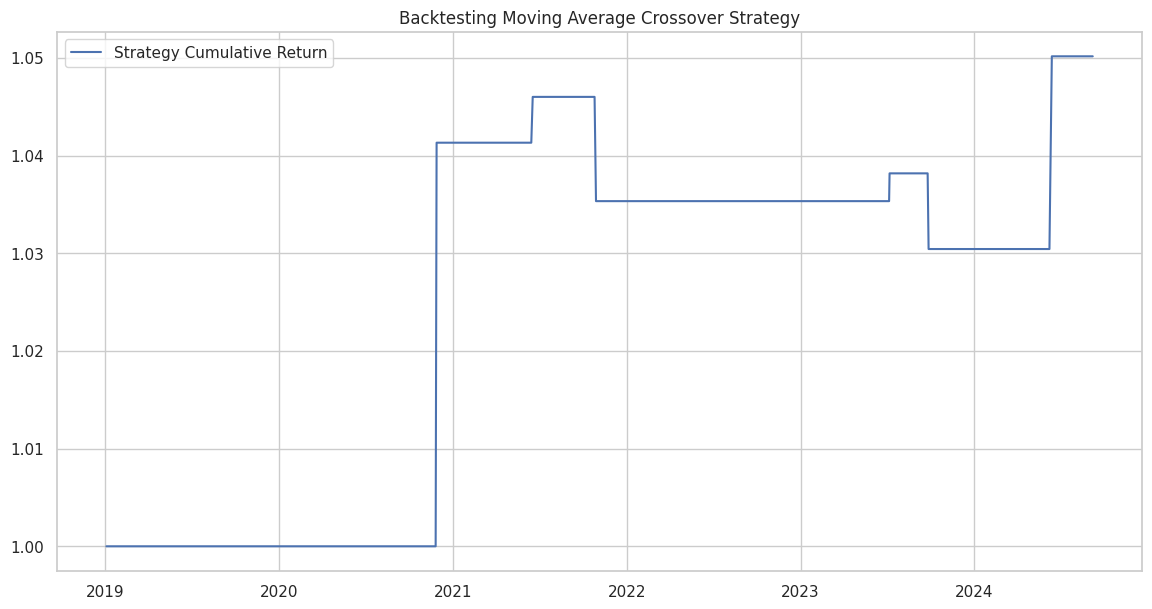

In [99]:
# Example: Simple Moving Average Crossover Strategy
bbni_daily['SMA_50'] = bbni_daily['Close'].rolling(window=50).mean()
bbni_daily['SMA_200'] = bbni_daily['Close'].rolling(window=200).mean()

# Generate signals
bbni_daily['Signal'] = 0
bbni_daily['Signal'][bbni_daily['SMA_50'] > bbni_daily['SMA_200']] = 1
bbni_daily['Position'] = bbni_daily['Signal'].diff()

# Backtest performance
bbni_daily['Strategy_Return'] = bbni_daily['Return'] * bbni_daily['Position'].shift(1)
cumulative_return = (1 + bbni_daily['Strategy_Return']).cumprod()

plt.figure(figsize=(14,7))
plt.plot(bbni_daily.index, cumulative_return, label='Strategy Cumulative Return')
plt.title('Backtesting Moving Average Crossover Strategy')
plt.legend()
plt.show()